In [160]:
import jenkspy as jenkspy
import pandas as pd

df = pd.read_csv('churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [161]:
from scipy import stats
df['Day_Mins_zscore'] = stats.zscore(df['Day Mins'])
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Day_Mins_zscore
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,1.566767
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,-0.333738
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,1.168304
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,2.196596
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,-0.240090


In [162]:
Day_Mins_Zscore_outlier= df.query('Day_Mins_zscore>3 | Day_Mins_zscore<-3')
Day_Mins_Zscore_outlier

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Day_Mins_zscore
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,18.40,253.9,100,11.43,10.1,9,2.73,1,True.,3.140422
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,21.21,275.4,102,12.39,13.3,9,3.59,1,True.,3.066972
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,...,21.81,169.4,88,7.62,7.7,9,2.08,1,False.,-3.071566
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,13.57,167.1,88,7.52,6.8,1,1.84,4,True.,-3.301096
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,16.33,168.8,95,7.60,7.2,4,1.94,1,False.,-3.301096
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,11.59,156.6,89,7.05,12.1,1,3.27,0,False.,-3.156033
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,17.29,217.5,107,9.79,11.8,8,3.19,1,True.,3.039429
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,21.59,242.7,156,10.92,9.2,5,2.48,3,False.,-3.253354
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,14.57,186.5,80,8.39,12.9,2,3.48,2,False.,-3.157869


In [163]:
df['CustServ_Calls_Zscore']= stats.zscore(df['CustServ Calls'])

CustServ_Calls_Zscore_Outlier=df.query('CustServ_Calls_Zscore>3 | CustServ_Calls_Zscore<-3')
CustServ_Calls_Zscore_Outlier[['CustServ Calls','Account Length']].sort_values(by=['CustServ Calls'],ascending=False)

,CustServ Calls,Account Length
542,9,152
2380,9,53
1502,8,64
1912,8,103
332,7,86
3112,7,115
2979,7,99
2953,7,136
522,7,122
1831,7,93


<AxesSubplot:>

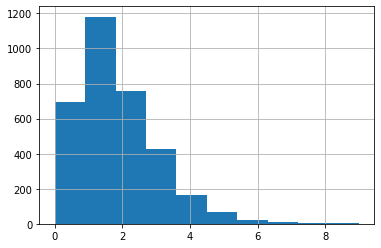

In [164]:
df['CustServ Calls'].hist()

In [165]:
df['Day Mins'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Day Mins, dtype: float64

In [166]:
df['Day Mins qcut'] = pd.qcut(df['Day Mins'], q=4, labels=['bucket_1', 'bucket_2','bucket_3','bucket_4'])
df['Day Mins qcut'].value_counts()

bucket_1    837
bucket_4    833
bucket_2    832
bucket_3    831
Name: Day Mins qcut, dtype: int64

<AxesSubplot:>

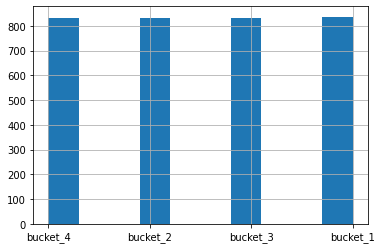

In [167]:
df['Day Mins qcut'].hist()

<AxesSubplot:>

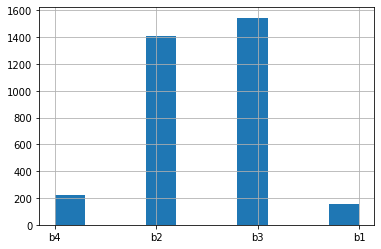

In [168]:
df['Day Mins cut']= pd.cut(df['Day Mins'],bins=4,labels=['b1','b2','b3','b4'])
#pd.cut(df['Day Mins'],bins=10).value_counts()
df['Day Mins cut'].hist()

In [169]:
breaks=jenkspy.jenks_breaks(df['Day Mins'], nb_class=4)
print(breaks)

[0.0, 123.3, 178.5, 232.9, 350.8]


<AxesSubplot:>

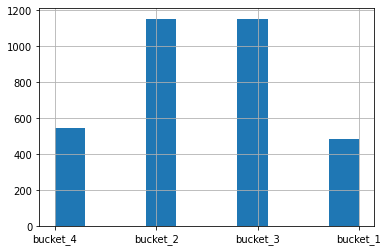

In [170]:
df['Day Mins jenkspy']=pd.cut(df['Day Mins'],bins=breaks,labels=['bucket_1', 'bucket_2','bucket_3','bucket_4'])
df['Day Mins jenkspy'].hist()